In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Membuat variable fuzzy

In [4]:
kecepatan_putar = ctrl.Consequent(np.arange(500, 1201, 1), 'kecepatan_putar')
banyaknya_pakaian = ctrl.Antecedent(np.arange(0, 101, 1), 'banyaknya_pakaian')
tingkat_kekotoran = ctrl.Antecedent(np.arange(0, 101, 1), 'tingkat_kekotoran')

# Mendefinisikan  untuk setiap variabel

variable banyaknya pakaian

c:\Users\Hani\.conda\envs\09040620070DATAMINING2023\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


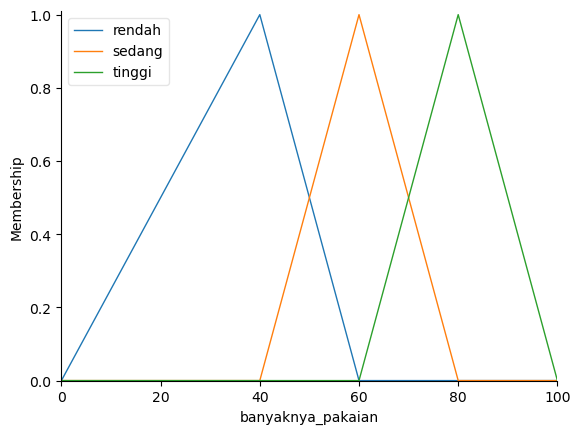

In [6]:
banyaknya_pakaian['rendah'] = fuzz.trimf(banyaknya_pakaian.universe, [0, 40, 60])
banyaknya_pakaian['sedang'] = fuzz.trimf(banyaknya_pakaian.universe, [40, 60, 80])
banyaknya_pakaian['tinggi'] = fuzz.trimf(banyaknya_pakaian.universe, [60, 80, 100])
banyaknya_pakaian.view()

variable tingkat kekotoran

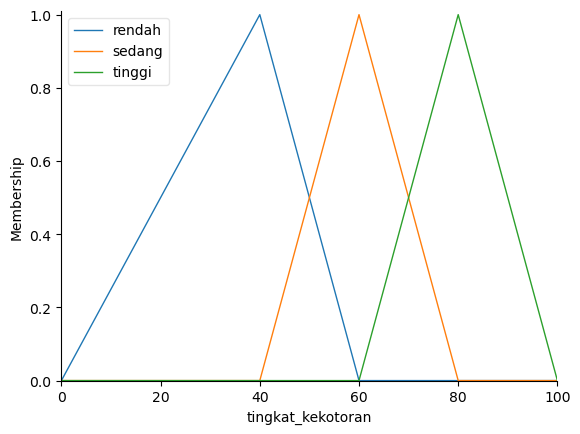

In [7]:
tingkat_kekotoran['rendah'] = fuzz.trimf(tingkat_kekotoran.universe, [0, 40, 60])
tingkat_kekotoran['sedang'] = fuzz.trimf(tingkat_kekotoran.universe, [40, 60, 80])
tingkat_kekotoran['tinggi'] = fuzz.trimf(tingkat_kekotoran.universe, [60, 80, 100])
tingkat_kekotoran.view()

variable kecepatan putar

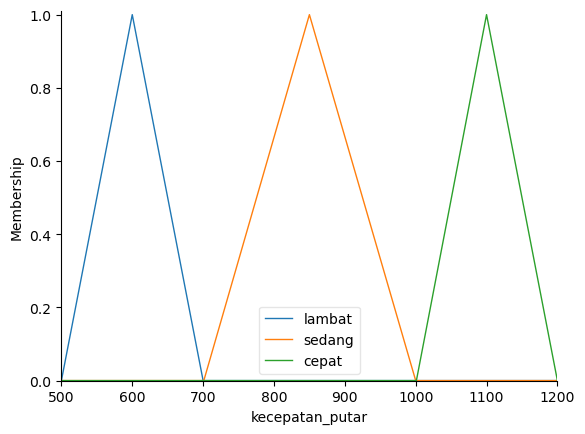

In [8]:
kecepatan_putar['lambat'] = fuzz.trimf(kecepatan_putar.universe, [500, 600, 700])
kecepatan_putar['sedang'] = fuzz.trimf(kecepatan_putar.universe, [701, 850, 1000])
kecepatan_putar['cepat'] = fuzz.trimf(kecepatan_putar.universe, [1001, 1100, 1200])
kecepatan_putar.view()

Rule - rule fuzzy


In [9]:
rule1 = ctrl.Rule(banyaknya_pakaian['rendah'] & tingkat_kekotoran['rendah'], kecepatan_putar['lambat'])
rule2 = ctrl.Rule(banyaknya_pakaian['sedang'] & tingkat_kekotoran['sedang'], kecepatan_putar['sedang'])
rule3 = ctrl.Rule(banyaknya_pakaian['tinggi'] & tingkat_kekotoran['tinggi'], kecepatan_putar['cepat'])

sistem kontrol fuzzy

In [10]:
sistem_kontrol = ctrl.ControlSystem([rule1, rule2, rule3])
mesin_cuci = ctrl.ControlSystemSimulation(sistem_kontrol)

memberikan input

In [11]:
mesin_cuci.input['banyaknya_pakaian'] = 75
mesin_cuci.input['tingkat_kekotoran'] = 55

Melakukan perhitungan

In [12]:
mesin_cuci.compute()

Mendapatkan hasil ouput

In [13]:
kecepatan_putar_mesin = mesin_cuci.output['kecepatan_putar']

Menampilkan hasil

In [14]:
print("Dengan data yang telah dimasukkan:")
print("Banyaknya pakaian = 20")
print("Tingkat kekotoran = 20")
print("Kecepatan putar mesin cuci:", kecepatan_putar_mesin)

Dengan data yang telah dimasukkan:
Banyaknya pakaian = 20
Tingkat kekotoran = 20
Kecepatan putar mesin cuci: 850.4404761904767


Visualisasi hasil ouput

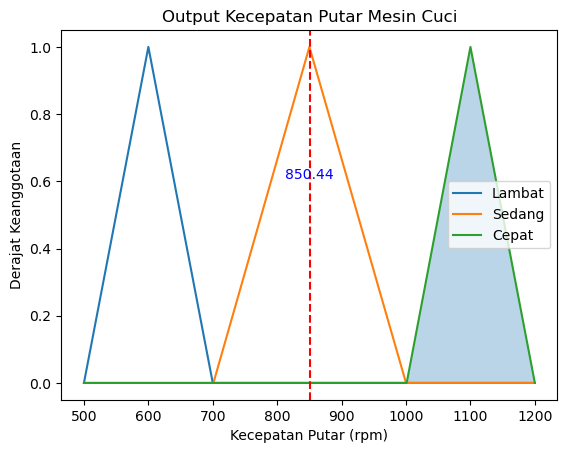

In [15]:
plt.figure()
plt.plot(kecepatan_putar.universe,
         kecepatan_putar['lambat'].mf, label='Lambat')
plt.plot(kecepatan_putar.universe,
         kecepatan_putar['sedang'].mf, label='Sedang')
plt.plot(kecepatan_putar.universe, kecepatan_putar['cepat'].mf, label='Cepat')
plt.fill_between(kecepatan_putar.universe,
                 kecepatan_putar['cepat'].mf, alpha=0.3)
plt.legend()
plt.xlabel('Kecepatan Putar (rpm)')
plt.ylabel('Derajat Keanggotaan')
plt.title('Output Kecepatan Putar Mesin Cuci')
plt.axvline(x=kecepatan_putar_mesin, color='red', linestyle='--')
plt.text(kecepatan_putar_mesin, 0.6,
         f'{kecepatan_putar_mesin:.2f}', color='blue', va='bottom', ha='center')

plt.show()